# A/B Test (Simple)

Scenario:

An e-commerce company is testing two versions of its product page:

- Version A (Control): The current design.
- Version B (Treatment): A redesigned page with a new “Buy Now” button style and layout.

The company wants to test if Version B increases the purchase conversion rate.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# --------------------------
# Step 1: Simulate A/B test data
# --------------------------
np.random.seed(42)

# Number of visitors
n_A = 5000
n_B = 5000

# Simulated conversion rates (assume treatment is slightly better)
conversion_rate_A = 0.10   # 10% conversion
conversion_rate_B = 0.12   # 12% conversion

# Simulate conversions (1 = purchase, 0 = no purchase)
group_A = np.random.binomial(1, conversion_rate_A, n_A)
group_B = np.random.binomial(1, conversion_rate_B, n_B)

# Create DataFrame
df = pd.DataFrame({
    'group': ['A'] * n_A + ['B'] * n_B,
    'converted': np.concatenate([group_A, group_B])
})

df.head()

,group,converted
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


In [4]:
# --------------------------
# Step 2: Summary statistics
# --------------------------
summary = df.groupby('group')['converted'].agg(['mean', 'sum', 'count'])
summary['conversion_rate'] = summary['mean'] * 100
print(summary)

         mean  sum  count  conversion_rate
group                                     
A      0.0958  479   5000             9.58
B      0.1134  567   5000            11.34


In [5]:
# --------------------------
# Step 3: Hypothesis test
# --------------------------
# Null hypothesis: No difference in conversion rates
# Alternative hypothesis: Version B has a higher conversion rate

conversions_A = summary.loc['A', 'sum']
conversions_B = summary.loc['B', 'sum']

# Proportions
p_A = conversions_A / n_A
p_B = conversions_B / n_B

# Pooled proportion
p_pool = (conversions_A + conversions_B) / (n_A + n_B)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_A + 1/n_B))

# Z-score
z_score = (p_B - p_A) / se

# One-tailed p-value
p_value = 1 - stats.norm.cdf(z_score)

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.4f}")

Z-score: 2.875
P-value: 0.0020


**Interpretation**

- If `p_value < 0.05`, we **reject** the null hypothesis and conclude that Version B significantly improves conversion rate.
- If `p_value >= 0.05`, there is **no statistically significant difference** between the two versions.

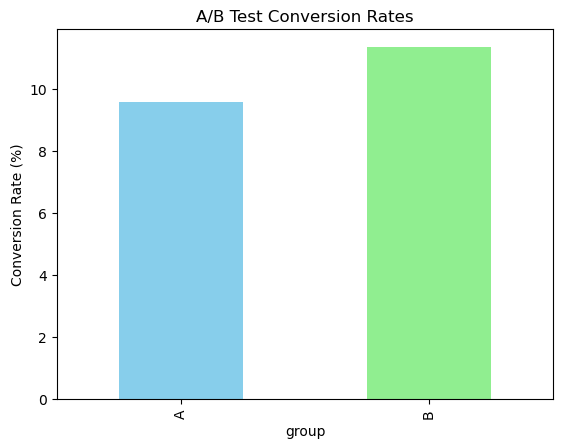

In [6]:
# --------------------------
# Step 4: Visualization
# --------------------------
fig, ax = plt.subplots()
summary['conversion_rate'].plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen'])
ax.set_ylabel("Conversion Rate (%)")
ax.set_title("A/B Test Conversion Rates")
plt.show()